In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # Importar matplotlib.pyplot

In [6]:

ruta_archivo = "../Datos/ObesityDataSet_raw_and_data_sinthetic.csv"

df = pd.read_csv(ruta_archivo)

df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
# Información general del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [11]:
# Estadísticas descriptivas para las variables numéricas
df_numerico = df.select_dtypes(include=[np.number])
print(df_numerico.describe())


               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [12]:
# Estadísticas descriptivas para las variables categóricas
df_categorico = df.select_dtypes(include=[object])  # Cambia np.object por object

for col in df_categorico.columns:
    print(df_categorico[col].value_counts())


Gender
Male      1068
Female    1043
Name: count, dtype: int64
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
SMOKE
no     2067
yes      44
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [13]:
# Correlaciones entre las variables numéricas
corr = df_numerico.corr()
print(corr)

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000  


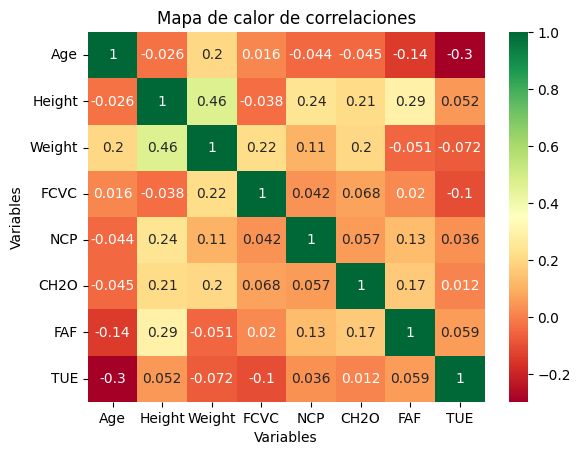

In [18]:
# Calcular la matriz de correlaciones
corr = df_numerico.corr()

# Crear el mapa de calor
sns.heatmap(corr, annot=True, cmap='RdYlGn')

# Añadir título y etiquetas
plt.title('Mapa de calor de correlaciones')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el gráfico
plt.show()

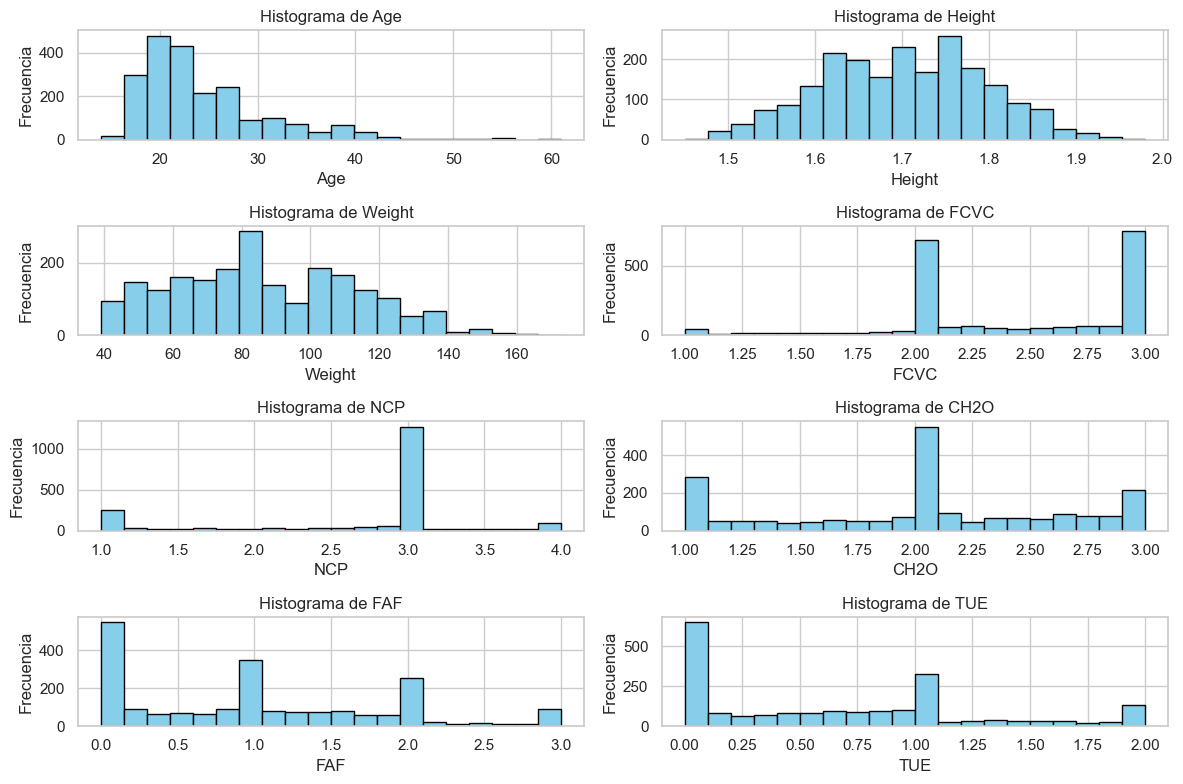

In [31]:
# Crear una lista con los nombres de las columnas numéricas
columnas_numericas = df_numerico.columns

# Definir el tamaño de la grilla
filas = 4
columnas = 2

# Crear la figura y los ejes utilizando subplots
fig, axs = plt.subplots(filas, columnas, figsize=(12, 8))

# Aplanar la matriz de ejes para iterar sobre ella más fácilmente
axs = axs.flatten()

# Iterar sobre las columnas numéricas y crear los histogramas
for i, columna in enumerate(columnas_numericas):
    # Seleccionar el eje actual
    ax = axs[i]
    
    # Crear el histograma para la columna actual
    ax.hist(df_numerico[columna], bins=20, color='skyblue', edgecolor='black')
    
    # Agregar etiquetas y título
    ax.set_title(f'Histograma de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Frecuencia')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la grilla de histogramas
plt.show()

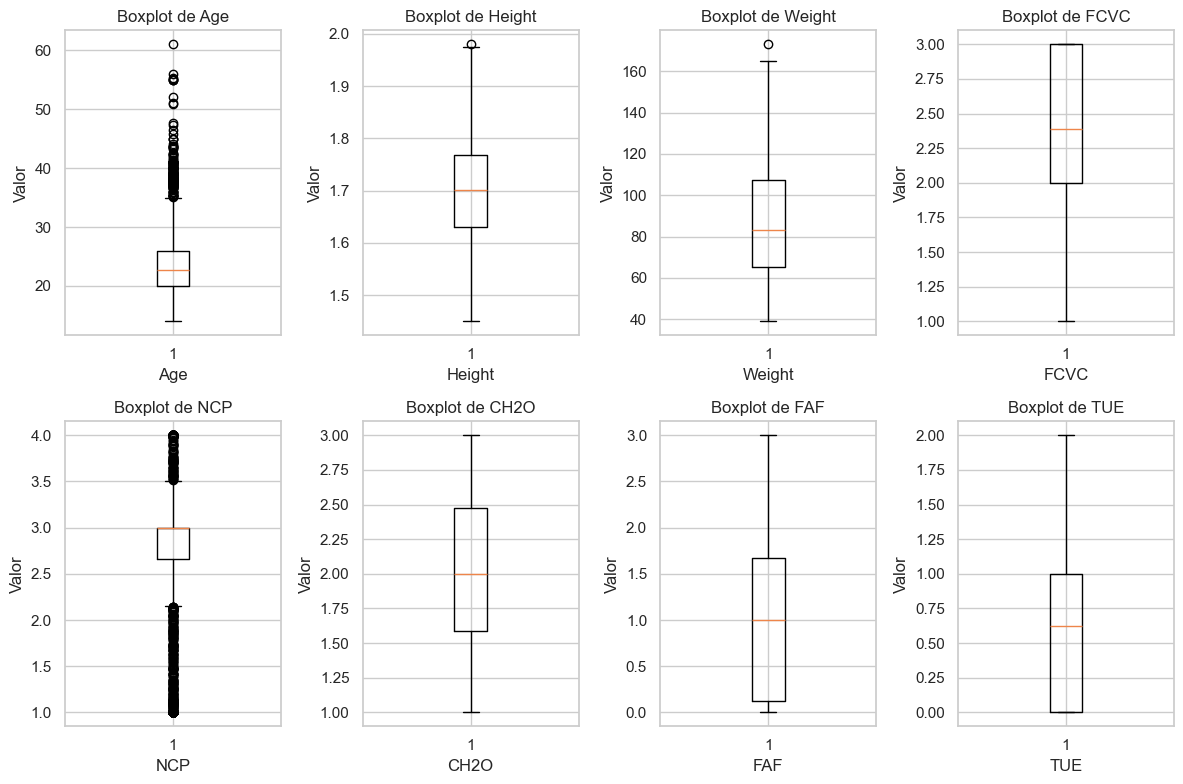

In [29]:
# Crear una lista con los nombres de las columnas numéricas
columnas_numericas = df_numerico.columns

# Definir el tamaño de la grilla
filas = 2
columnas = 4

# Crear la figura y los ejes utilizando subplots
fig, axs = plt.subplots(filas, columnas, figsize=(12, 8))

# Aplanar la matriz de ejes para iterar sobre ella más fácilmente
axs = axs.flatten()

# Iterar sobre las columnas numéricas y crear los boxplots
for i, columna in enumerate(columnas_numericas):
    # Seleccionar el eje actual
    ax = axs[i]
    
    # Crear el boxplot para la columna actual
    ax.boxplot(df_numerico[columna])
    
    # Agregar etiquetas y título
    ax.set_title(f'Boxplot de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Valor')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la grilla de boxplots
plt.show()

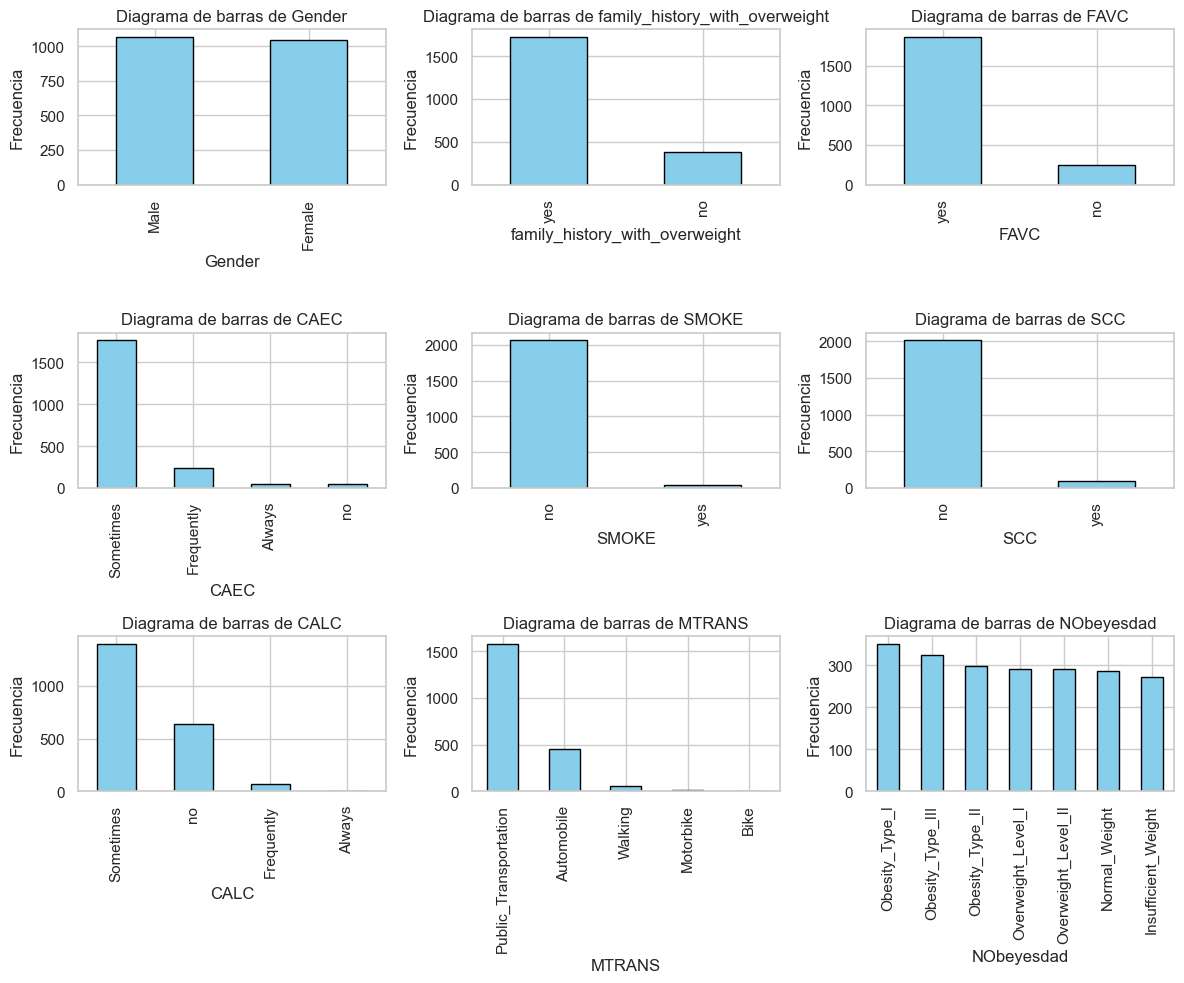

In [35]:
# Obtener una lista de las columnas categóricas
columnas_categoricas = df_categorico.columns

# Definir el tamaño de la grilla
filas = 3
columnas = 3

# Crear la figura y los ejes utilizando subplots
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))

# Aplanar la matriz de ejes para iterar sobre ella más fácilmente
axs = axs.flatten()

# Iterar sobre las columnas categóricas y crear los diagramas de barras
for i, columna in enumerate(columnas_categoricas):
    # Seleccionar el eje actual
    ax = axs[i]
    
    # Contar la frecuencia de cada categoría y crear el diagrama de barras
    df_categorico[columna].value_counts().plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    
    # Agregar etiquetas y título
    ax.set_title(f'Diagrama de barras de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Frecuencia')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la grilla de diagramas de barras
plt.show()

In [36]:
# Calcular el Z-Score para cada punto de datos en una columna específica
def zscore_outliers(column):
    z_scores = (column - column.mean()) / column.std()
    return column[np.abs(z_scores) > 3]

# Aplicar la función a cada columna numérica en el DataFrame
outliers = df_numerico.apply(zscore_outliers)

# Mostrar los valores atípicos encontrados
print("Valores atípicos:")
print(outliers)

Valores atípicos:
            Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
21    52.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
92    55.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
133   61.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
137   44.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
161   55.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
169   45.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
232   51.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
252   56.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
344         NaN     NaN   173.0   NaN  NaN   NaN  NaN  NaN
492   45.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
1013  55.246250     NaN     NaN   NaN  NaN   NaN  NaN  NaN
1034  50.832559     NaN     NaN   NaN  NaN   NaN  NaN  NaN
1063  45.000000     NaN     NaN   NaN  NaN   NaN  NaN  NaN
1088  55.137881     NaN     NaN   NaN  NaN   NaN  NaN  NaN
1101  46.491859     NaN     NaN   NaN  NaN   NaN  NaN  NaN
1158  55.022494     NaN     NaN   NaN 